# Về xác suất tiên nghiệm và hậu nghiệm

X có không gian mẫu ${x_1, x_2, ..., x_n}$  
Y có không gian mẫu ${y_1, y_2, ..., y_n}$  
  
X có hàm phân phối là g <= xác suất tiên nghiệm của X  
Y có hàm phân phối là f  
  
Cách tính xác suất hậu nghiệm với xác suất tiên nghiệm ở dạng rời rạc  
$(x_i, y_j)$  
$g(x_i, y_j) = g(x_i) * f(y_j | x_i)$  với $f(y_j | x_i)$ là hàm hợp lý  
$g(x_i, y_j)$ = tổng từ h = 1 đến n của $|g(x_{ih}) * f(y_j | x_{ih})$  ??  
  


## Bài tập ví dụ:

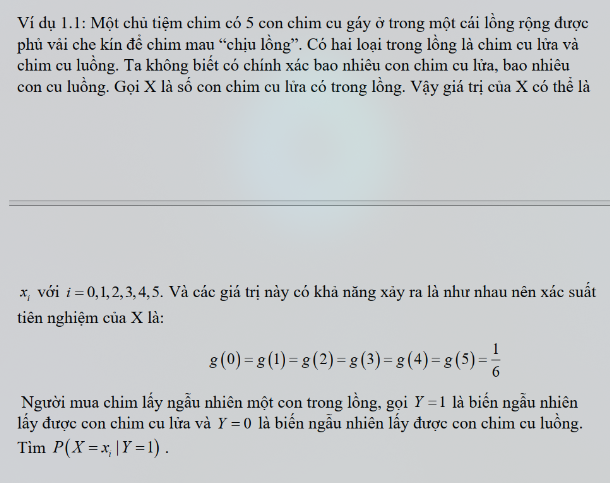

### Ví dụ 1.  
(Dạng bài tập cho xác suất tiên nghiệm của biến ngẫu nhiên rời rạc)  
Có 5 con chim cu gáy trong 1 cái lồng rộng được che kín để chim bình tĩnh.  
Có 2 loại lồng là chim cu lửa và chim cu luồng.  
Số lượng chim ở 2 loại là không xác định.  
Giả sử $X$ là số lượng chim cu lửa trong lồng $\rightarrow X = {0,1,2,3,4,5}$  
Vì các giá trị có thể có của $X$ là như nhau nên: $g(0)=g(1)=g(2)=g(3)=g(4)=g(5)=\frac{1}{6}$  
  
Người mua chim muốn lấy ngẫu nhiên 1 con trong lồng, vậy nên ta gọi:
- Y = 1 là biến ngẫu nhiên lấy được chim cu lửa  
- Y = 0 là biến ngẫu nhiên lấy được chim cu luồng  
  
Tìm $P(X = x_i | Y = 1)$  

**Bài giải**:  
Để tìm $P(X = x_i | Y = 1)$, ta sử dụng công thức Bayes:

$P(X=x_i ∣ Y=1) = \frac{P(Y=1 ∣ X=x_i) \cdot P(X=x_i)}{P(Y=1)}$​

Trong đó:

$P(Y = 1 | X = x_i)$ là xác suất để chọn được chim cu lửa khi đã biết có $x_i$ con chim cu lửa trong lồng. Cái này gọi là xác suất điều kiện - hàm hợp lý.  
$P(X = x_i)$ là xác suất để có $x_i$ con chim cu lửa trong lồng, đã được xác định là $\frac{1}{6}$. Cái này gọi là **xác suất tiên nghiệm của biến ngẫu nhiên rời rạc $X$**.  
$P(Y = 1)$ là xác suất để chọn được chim cu lửa mà không quan tâm đến số lượng chim trong lồng. Cái này gọi là xác suất hậu nghiệm.  
  
Ta biết rằng:
  
$P(Y = 1 | X = x_i)$ có thể tính bằng $\frac{x_i}{5}$, vì khi trong lồng có $x_i$ con chim cu lửa thì xác suất để chọn được chim cu lửa là $\frac{x_i}{5}$.  
$P(Y = 1)$ là tổng của các trường hợp $P(Y = 1 | X = x_i) \cdot P(X = x_i)$, tức là xác suất để chọn được chim cu lửa mà không quan tâm đến số lượng chim cu lửa trong lồng.  

In [1]:
# Tính P(Y = 1 | X = xi)
prob_Y_given_X <- function(xi) {
    return(xi / 5)
}

# Tính P(X = xi | Y = 1)
prob_X_given_Y <- function(xi) {
    prob_X <- 1 / 6 # P(X = xi)
    prob_Y_given_Xi <- prob_Y_given_X(xi) # P(Y = 1 | X = xi)
    prob_Y <- sum(sapply(0:5, function(x) prob_Y_given_X(x) * prob_X)) # P(Y = 1)

    return(prob_Y_given_Xi * prob_X / prob_Y)
}

# Tính và hiển thị kết quả cho mỗi giá trị của xi
for (xi in 0:5) {
    cat("P(X =", xi, "| Y = 1) =", prob_X_given_Y(xi), "\n")
}


P(X = 0 | Y = 1) = 0 
P(X = 1 | Y = 1) = 0.06666667 
P(X = 2 | Y = 1) = 0.1333333 
P(X = 3 | Y = 1) = 0.2 
P(X = 4 | Y = 1) = 0.2666667 
P(X = 5 | Y = 1) = 0.3333333 


Để kiểm tra kết quả thì cộng toàn bộ xác suất này vào cho = 1 thì có xác suất cao là đúng còn nếu không thì chắc chắn sai.

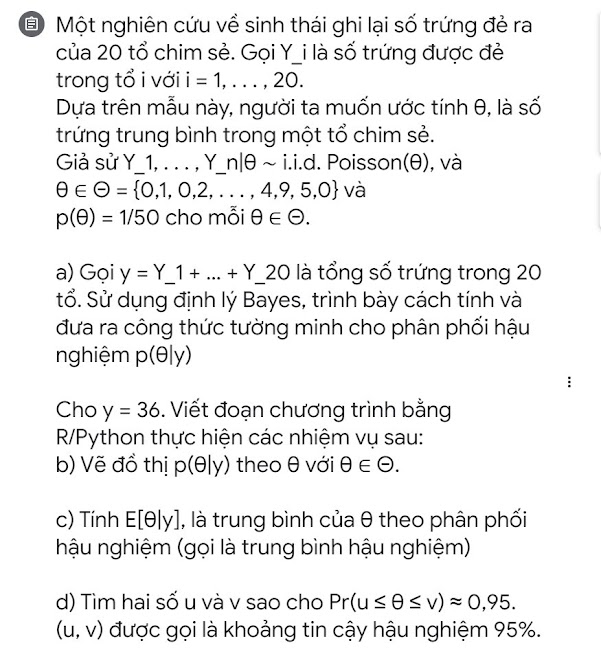

### Ví dụ 2.   
(Dạng bài tập cho xác suất tiên nghiệm là biến ngẫu nhiên ...)  
Dữ liệu ghi lại số trứng đẻ ra của 20 tổ chim sẻ  
Dựa trên mẫu này muốn ước tính $\theta$ (số trứng trung bình trong 1 tổ chim sẻ)  
Giả sử $(Y_1, ..., Y_n | \theta) \sim Poison(\theta)$, $\theta \in A = (0.1, 0.2, ..., 4.9, 5.0)$ và $p(\theta) = \frac{1}{50}$ cho mỗi $\theta \in A$  
**Tính chất đặc biệt của phân phối Poison** là tổng của các phân phối Poison là 1 phân phối Poison  
  
a. Gọi $y = Y_1 + Y_2 + ... + Y_20$ là tổng số trứng trong 20 tổ.  
Sử dụng định lý Bayes trình bày cách tính và đưa ra công thức tường minh cho phân phối hậu nghiệm $p(\theta | y)$  
  
Cho y = 36. Viết đoạn chương trình thực hiện các nhiệm vụ b. c. d. sau:  
b. Vẽ đồ thị $p(\theta | y) theo $\theta$ với $\theta \in A$  
c. Tính $E[\theta | y]$ là trung bình của $\theta$ theo phân phối hậu nghiệm (gọi là trung bình hậu nghiệm)  
d. Tìm 2 số $u, v$ sao cho $Pr(u \leq \theta \leq v) \approx 0.95$.  
Với $(u, v)$ được gọi là khoảng tin cậy hậu nghiệm 95%

**Bài giải**:  
  
a. Để tính phân phối hậu nghiệm $p(\theta | y)$, ta sử dụng định lý Bayes:  
  
$p(\theta | y) = \frac{p(y | \theta) \cdot p(\theta)}{\sum_{\theta' \in A} p(y | \theta') \cdot p(\theta')}$  
  
Trong đó:
- $p(y | \theta)$ là hàm mật độ xác suất của tổng số trứng $y$ khi $\theta$ được cho trước, tức là phân phối Poisson với $\theta$.
- $p(\theta)$ là phân phối tiên nghiệm của $\theta$, đã được xác định là đều trên khoảng $A$.
- Tên gọi $p(\theta | y)$ là phân phối hậu nghiệm của $\theta$ dưới điều kiện đã biết tổng số trứng $y$.

Với $y = 36$, ta sẽ tính $p(\theta | y)$ cho mỗi giá trị $\theta \in A$ và sau đó vẽ đồ thị, tính trung bình hậu nghiệm và tìm khoảng tin cậy hậu nghiệm 95%.

Đoạn chương trình R sau sẽ thực hiện các nhiệm vụ b, c, d:

```R
```

a. Phân phối hậu nghiệm p(theta | y) cho y = 36 là: 4.380725e-60 2.723932e-49 5.383345e-43 1.532559e-38 4.273152e-35 2.740588e-32 6.375272e-30 7.059588e-28 4.43446e-26 1.78107e-24 4.981821e-23 1.033587e-21 1.668604e-20 2.175567e-19 2.359495e-18 2.179835e-17 1.749186e-16 1.238955e-15 7.851371e-15 4.50263e-14 2.359672e-13 1.139578e-12 5.10858e-12 2.139308e-11 8.415492e-11 3.125002e-10 1.100211e-09 3.686718e-09 1.179911e-08 3.617905e-08 1.065819e-07 3.024352e-07 8.285247e-07 2.195913e-06 5.641496e-06 1.40736e-05 3.414663e-05 8.069857e-05 0.0001860171 0.0004187522 0.0009216942 0.001985697 0.004191539 0.008677128 0.01763197 0.03519676 0.06907394 0.1333664 0.2535078 0.4747043 


c. Trung bình hậu nghiệm E[theta | y] = 4.893002 
d. Khoảng tin cậy hậu nghiệm 95%: (u = 4.5 , v = 4.9 )


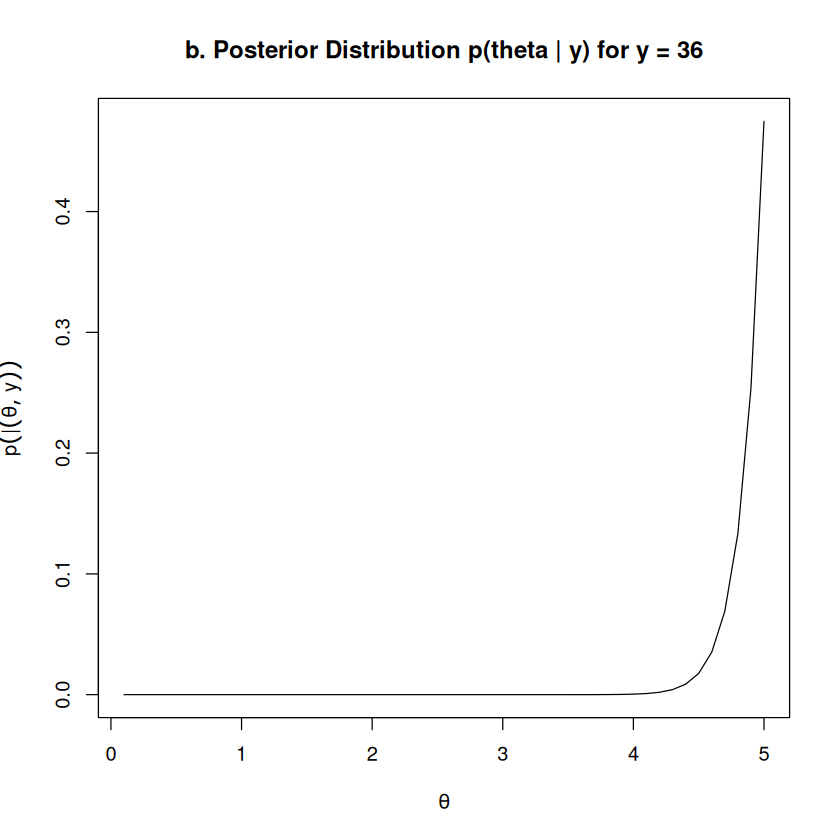

In [4]:
theta_values <- seq(0.1, 5.0, by = 0.1) # Giá trị theta từ 0.1 đến 5.0 với bước nhảy 0.1

# Hàm mật độ xác suất Poisson
poisson_pdf <- function(y, theta) {
  return(exp(-theta) * theta^y / factorial(y))
}

# Tính phân phối hậu nghiệm p(theta | y)
posterior <- function(y) {
  numerator <- sapply(theta_values, function(theta) poisson_pdf(y, theta) * (1/50))
  denominator <- sum(numerator)
  return(numerator / denominator)
}

# a. Tính và hiển thị phân phối hậu nghiệm p(theta | y) cho y = 36
y <- 36
posterior_distribution <- posterior(y)
cat("a. Phân phối hậu nghiệm p(theta | y) cho y = 36 là:", posterior_distribution, "\n")

# b. Vẽ đồ thị p(theta | y) theo theta
plot(theta_values, posterior_distribution, type = "l", 
     xlab = expression(theta), ylab = expression(p(theta | y)), 
     main = "b. Posterior Distribution p(theta | y) for y = 36")

# c. Tính trung bình hậu nghiệm E[theta | y]
expected_theta <- sum(theta_values * posterior_distribution)
cat("c. Trung bình hậu nghiệm E[theta | y] =", expected_theta, "\n")

# d. Tìm khoảng tin cậy hậu nghiệm 95%
cumulative_posterior <- cumsum(posterior_distribution)
lower_quantile <- theta_values[min(which(cumulative_posterior >= 0.025))]
upper_quantile <- theta_values[max(which(cumulative_posterior <= 0.975))]
cat("d. Khoảng tin cậy hậu nghiệm 95%: (u =", lower_quantile, ", v =", upper_quantile, ")\n")


Kết quả sẽ bao gồm đồ thị của phân phối hậu nghiệm, trung bình hậu nghiệm, và khoảng tin cậy hậu nghiệm 95%.

 [1] 5.000181e-32 4.650253e-22 1.374589e-16 5.853000e-13 2.440900e-10
 [6] 2.341456e-08 8.146694e-07 1.349281e-05 1.267665e-04 7.615266e-04
[11] 3.185905e-03 9.886259e-03 2.387145e-02 4.655201e-02 7.551367e-02
[16] 1.043448e-01 1.252344e-01 1.326733e-01 1.257517e-01 1.078637e-01
[21] 8.454756e-02 6.107085e-02 4.094780e-02 2.564745e-02 1.509006e-02
[26] 8.381122e-03 4.413348e-03 2.211937e-03 1.058821e-03 4.855914e-04
[31] 2.139626e-04 9.080862e-05 3.720838e-05 1.474996e-05 5.667748e-06
[36] 2.114765e-06 7.674412e-07 2.712711e-07 9.352570e-08 3.149023e-08
[41] 1.036683e-08 3.340509e-09 1.054663e-09 3.265552e-10 9.924801e-11
[46] 2.963223e-11 8.697937e-12 2.511823e-12 7.141252e-13 2.000077e-13
[1] 1
Mean:

[1] 0.037

Mode:

[1] "numeric"

[1] "Khoảng tin cậy hậu nghiệm 95%: ( 1.3 , 2.4 )"


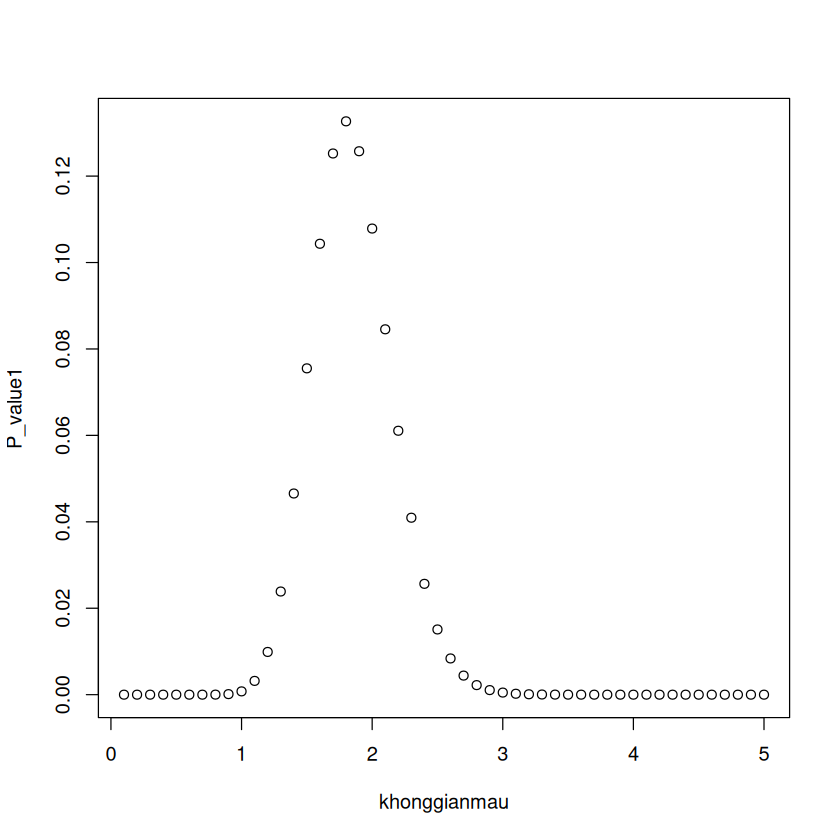

In [13]:
# Xác xuất tiên nghiệm
prior_Y <- 1 / 50

# Hàm hợp lý likelyhood: Phân bố Possion
likelyhood <- function(e, y) {
    return(exp(-20 * e) * (20 * e)^y / factorial(y))
}

# Tính mẫu
khonggianmau <- seq(0.1, 5, by = 0.1)
y <- 36
mau <- 0
for (theta_i in khonggianmau) {
    temp <- prior_Y * likelyhood(theta_i, y)
    mau <- mau + temp
}

# Tính xác xuất
P_value1 <- c()
for (theta_i in khonggianmau) {
    p <- (prior_Y * likelyhood(theta_i, y)) / mau
    P_value1 <- c(P_value1, p)
}

print(P_value1)
print(sum(P_value1))

# Vẽ đồ thị
plot(khonggianmau, P_value1)

# Tính trung bình
cat("Mean:")
mean(P_value1 * khonggianmau)
cat("Mode:")
mode(P_value1 * khonggianmau)

# Khoảng tin cậy
# lower_bound <- min(khonggianmau[P_value1 >= 0.025])
# upper_bound <- max(khonggianmau[P_value1 <= 0.975])
# print(paste("Khoảng tin cậy hậu nghiệm 95%: (", lower_bound, ",", upper_bound, ")"))

sum_P <- c()
temp <- 0
for (i in P_value1) {
    temp <- temp + i
    sum_P <- c(sum_P, temp)
}

index_c_max <- which(sum_P <= 0.975)
index_c_min = which(sum_P >= 0.025)
index_min <- min(index_c_min)
index_max <- max(index_c_max)
# print(index)

u <- khonggianmau[index_min]
v <- khonggianmau[index_max]
print(paste("Khoảng tin cậy hậu nghiệm 95%: (", u, ",", v, ")"))
